# Supplemental Figures

Kexin Dong, Samuel Gould

Last Update: Jan 23, 2025

NOTE: NEED TO BE FINISHED from old repo analysis 1.

In [ ]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import time
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']

yellows = sns.color_palette('Oranges').as_hex()
blues   = sns.color_palette('Blues').as_hex()
greens  = sns.color_palette('Greens').as_hex()
reds    = sns.color_palette('Reds').as_hex()
purples = sns.color_palette('Purples').as_hex()

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## Focused Screen Quality Control

## Load Count Matrix

In [12]:
fp = 'counts/focused/'
ABE_BC_COUNTS = pd.read_csv(fp + 'FC_ABE_BC_COUNTS.txt', sep='\t')
ABE_EPO_COUNTS = pd.read_csv(fp + 'FC_ABE_EPO_COUNTS.txt', sep='\t')
# CBE_BC_COUNTS = pd.read_csv(fp + 'CBE_BC_COUNTS.txt', sep='\t')
# CBE_EPO_COUNTS = pd.read_csv(fp + 'CBE_EPO_COUNTS.txt', sep='\t')
ABE_BC_COUNTS = ABE_BC_COUNTS[ABE_BC_COUNTS.columns[2:]]
ABE_EPO_COUNTS = ABE_EPO_COUNTS[ABE_EPO_COUNTS.columns[2:]]
# CBE_EPO_COUNTS = CBE_EPO_COUNTS[CBE_EPO_COUNTS.columns[2:]]
# CBE_BC_COUNTS = CBE_BC_COUNTS[CBE_BC_COUNTS.columns[2:]]

### PCA

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


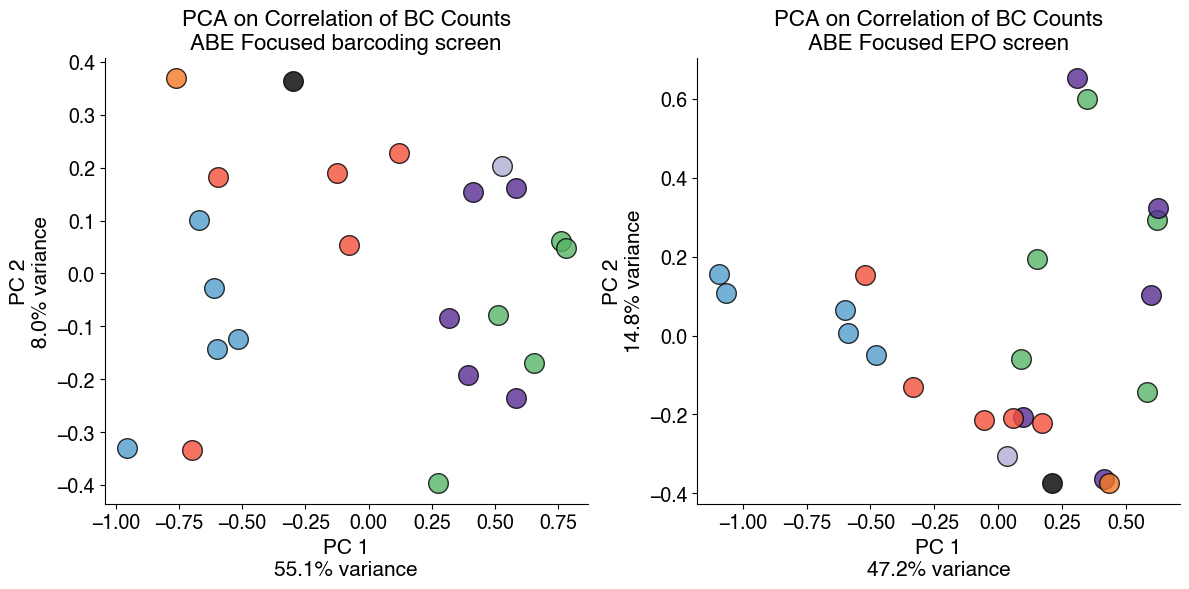

In [15]:
def pca_scatter(data, ax, title, palette):
    """
    data: dataframe to compute correlation and PCA
    ax: subplot axis
    title: subplot title
    palette: list of colors for each point
    """

    # PCA on correlation matrix
    pca = PCA(n_components=2)
    Xt = pca.fit_transform(data.corr(method='spearman'))

    # scatter points
    for i in range(len(Xt)):
        ax.scatter(
            Xt[i][0], Xt[i][1],
            edgecolor='black',
            s=200,
            alpha=.8,
            c=palette[i]
        )

    # explained variance
    var = pca.explained_variance_ratio_

    ax.set_xlabel(f'PC 1\n{np.round(var[0]*100, 1)}% variance', fontsize=15)
    ax.set_ylabel(f'PC 2\n{np.round(var[1]*100, 1)}% variance', fontsize=15)

    ax.spines[['top', 'right']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_title(title, fontsize=16)

yellows = sns.color_palette('Oranges').as_hex()
blues   = sns.color_palette('Blues').as_hex()
greens  = sns.color_palette('Greens').as_hex()
reds    = sns.color_palette('Reds').as_hex()
purples = sns.color_palette('Purples').as_hex()

palette = [
    greens[3], greens[3], greens[3], greens[3], greens[3],   # bone marrow
    purples[5], purples[5], purples[5], purples[5], purples[5], # d15
    purples[2],             # d5
    yellows[3],             # input
    'black',                # plasmid
    reds[3], reds[3], reds[3], reds[3], reds[3],   # men
    blues[3], blues[3], blues[3], blues[3], blues[3] # spleen
]
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False)
pca_scatter(ABE_BC_COUNTS,  axes[0], "PCA on Correlation of BC Counts\nABE Focused barcoding screen", palette)
pca_scatter(ABE_EPO_COUNTS, axes[1], "PCA on Correlation of BC Counts\nABE Focused EPO screen",      palette)

fig.tight_layout()
fig.savefig('figures/pca_focused_abe.pdf')
plt.show()



### Skew ratio

In [4]:
ABE_BC_samps = list(ABE_BC_COUNTS.columns)
ABE_EPO_samps = list(ABE_EPO_COUNTS.columns)

BC_skew = []
EPO_skew = []
for i in ABE_BC_samps:
    d = sorted(np.asarray(ABE_BC_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        BC_skew.append(d[ninety]/d[ten])
    else:
        BC_skew.append(d[ninety])

for i in ABE_EPO_samps:
    d = sorted(np.asarray(ABE_EPO_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        EPO_skew.append(d[ninety]/d[ten])
    else:
        EPO_skew.append(d[ninety])

BC_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_BC_samps, BC_skew])))
EPO_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [ABE_EPO_samps, EPO_skew])))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


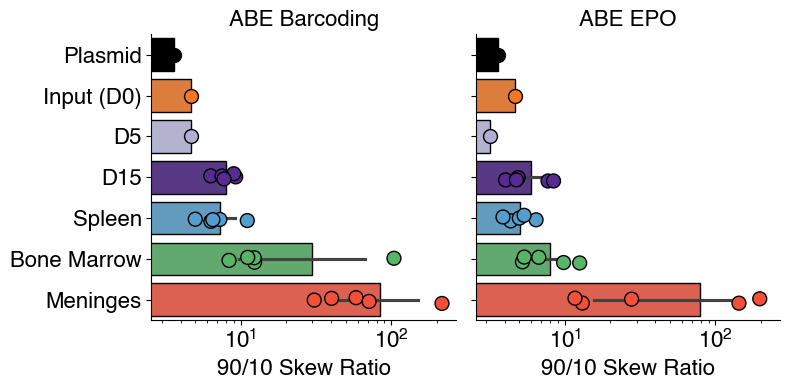

In [11]:
ax_dict_BC = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5',
        'input',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,
        1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

ax_dict_EPO = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5',
        'input',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,
        1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input (D0)','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

BC_name = []
EPO_name = []
for i, val in BC_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_BC[s]
    s3 = d2[s2]
    BC_name.append(s3)

for i, val in EPO_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_EPO[s]
    s3 = d2[s2]
    EPO_name.append(s3)

BC_skew_df['Name'] = BC_name
EPO_skew_df['Name'] = EPO_name

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('ABE Barcoding', fontsize=16)
ax[1].set_title('ABE EPO', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()
plt.savefig('figures/focused_skew_abe.pdf')
plt.show()

In [ ]:
CBE_BC_samps = list(CBE_BC_COUNTS.columns)
CBE_EPO_samps = list(CBE_EPO_COUNTS.columns)

BC_skew = []
EPO_skew = []
for i in CBE_BC_samps:
    d = sorted(np.asarray(CBE_BC_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        BC_skew.append(d[ninety]/d[ten])
    else:
        BC_skew.append(d[ninety])

for i in CBE_EPO_samps:
    d = sorted(np.asarray(CBE_EPO_COUNTS[i]))
    ten = int(.1*len(d))
    ninety = int(.9*len(d))
    if d[ten]>0:
        EPO_skew.append(d[ninety]/d[ten])
    else:
        EPO_skew.append(d[ninety])

BC_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_BC_samps, BC_skew])))
EPO_skew_df = pd.DataFrame(dict(zip(['Sample', '90/10 Skew Ratio'], [CBE_EPO_samps, EPO_skew])))

In [ ]:
ax_dict_BC = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5-rep1', 'd5-rep2', 'd5-rep3','d5-rep4', 'd5-rep5', 
        'input-rep1','input-rep2','input-rep3','input-rep4','input-rep5',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,2,2,2,2,
        1,1,1,1,1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

ax_dict_EPO = dict(
    zip(['bm1', 'bm2', 'bm3', 'bm4', 'bm5', 
        'd15-rep1', 'd15-rep2', 'd15-rep3','d15-rep4', 'd15-rep5', 
        'd5-rep1', 'd5-rep2', 'd5-rep3','d5-rep4', 'd5-rep5', 
        'input-rep1','input-rep2','input-rep3','input-rep4','input-rep5',
        'lib',
        'men1', 'men2', 'men3','men4', 'men5', 
        'spleen1', 'spleen2', 'spleen3', 'spleen4', 'spleen5'], 
       [5,5,5,5,5,
        3,3,3,3,3,
        2,2,2,2,2,
        1,1,1,1,1,
        0,
        6,6,6,6,6,
        4,4,4,4,4]))

d2 = dict(zip([0,1,2,3,4,5,6],['Plasmid', 'Input (D0)','D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']))

BC_name = []
EPO_name = []
for i, val in BC_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_BC[s]
    s3 = d2[s2]
    BC_name.append(s3)

for i, val in EPO_skew_df.iterrows():
    s = val['Sample']
    s2 = ax_dict_EPO[s]
    s3 = d2[s2]
    EPO_name.append(s3)

BC_skew_df['Name'] = BC_name
EPO_skew_df['Name'] = EPO_name

/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)
/var/folders/rl/65f1zcd575n092yn3xlqlqfw0000gn/T/ipykernel_29788/412985586.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

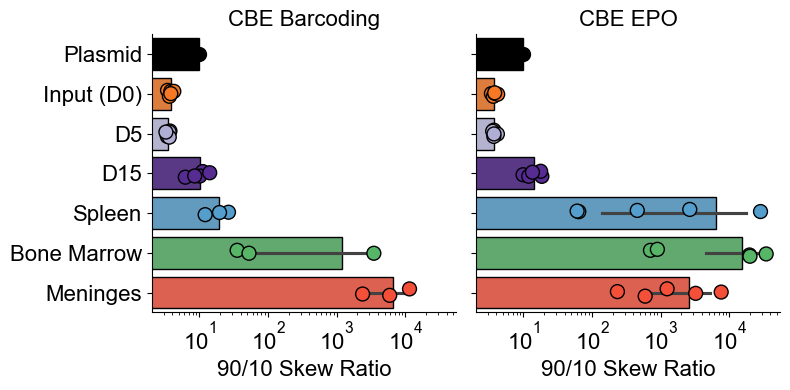

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True, sharex=True)

blues = blues.as_hex()
greens = greens.as_hex()
reds = reds.as_hex()
yellows = yellows.as_hex()

palette = ['black', yellows[3], purples[2], purples[5], blues[3], greens[3], reds[3]]
order=['Plasmid', 'Input (D0)', 'D5', 'D15', 'Spleen', 'Bone Marrow', 'Meninges']

sns.barplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order)
sns.barplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette,order=order)

sns.stripplot(data = BC_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[0], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
sns.stripplot(data = EPO_skew_df, y='Name', x='90/10 Skew Ratio', ax=ax[1], edgecolor='black', linewidth=1, palette = palette, order=order, s=10)
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].spines[['top', 'right']].set_visible(False)
ax[0].tick_params(axis='both', which='major', labelsize=16,)
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].tick_params(axis='both', which='major', labelsize=16,)
ax[0].set_title('CBE Barcoding', fontsize=16)
ax[1].set_title('CBE EPO', fontsize=16)
ax[0].set_xlabel('90/10 Skew Ratio', fontsize=16)
ax[1].set_xlabel('90/10 Skew Ratio', fontsize=16)

fig.tight_layout()
plt.savefig('figures/focused_skew_cbe.pdf')